In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
from data_loader import load_images_and_labels

# Preprocessing and Feature Engineering Data

In [4]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

exclude_classes = {"airplanes", "Motorbikes", "Faces", "Faces_easy", "watch", "Leopards"}
images, labels, class_names = load_images_and_labels(directory, img_height, img_width, exclude_classes)

In [5]:
images = images / 255.0 # normalize image color values from 0-255 to 0-1

n_samples = images.shape[0]
print("Number of samples and image shape:", n_samples, images.shape)
data = images.reshape((n_samples, -1))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Number of samples and image shape: 5770 (5770, 128, 128, 3)
Class Names: ['accordion', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball

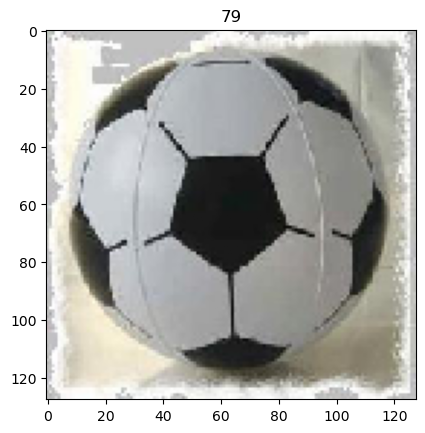

In [6]:
# show a random image
index = random.randint(0, n_samples)
plt.imshow(images[index])
plt.title(labels[index])
plt.show()

# SVC Model

In [7]:
model = Pipeline([ ("svc", SVC(kernel="linear", verbose=1))])

In [8]:
model.fit(x_train, y_train)

[LibSVM]

Pipeline(steps=[('svc', SVC(kernel='linear', verbose=1))])

In [9]:
y_pred = model.predict(x_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted labels:", len(y_pred))
print("True labels:", len(y_test))
print("Misclassified samples:", len((y_test != y_pred).nonzero()[0]))

Accuracy: 0.2920277296360485
Predicted labels: 1154
True labels: 1154
Misclassified samples: 817


In [11]:
y_test.shape, y_pred.shape

((1154,), (1154,))

In [12]:
y_test

array([31, 89, 23, ..., 84,  7, 70])

In [13]:
y_pred

array([14, 61, 24, ..., 84,  7,  2])